# 대구광역시 남녀비율 파이그래프 그리기
- 대구광역시 전체 + 7개 구별(중구,동구,서구,남구,북구,수성구,달서구) => 달성군 제외
- 총 8개의 남녀 비율 파이차트 그리기
- subplot으로 2x4형태로 구현

In [43]:
# 모듈로딩
import csv
import platform
import matplotlib.pyplot as plt

In [44]:
# 열이름 인덱스 알아보기
f=open('../Data/gender.csv',encoding='euc_kr')
data=csv.reader(f)
header=next(data)

for i in range(len(header)):
    print(f'[{i:4d}]:{header[i]}',end=',')
    if (i+1)%3==0: # 3개씩 출력할 때마다
        print() #엔터
f.close()

[   0]:행정구역,[   1]:2022년06월_계_총인구수,[   2]:2022년06월_계_연령구간인구수,
[   3]:2022년06월_계_0세,[   4]:2022년06월_계_1세,[   5]:2022년06월_계_2세,
[   6]:2022년06월_계_3세,[   7]:2022년06월_계_4세,[   8]:2022년06월_계_5세,
[   9]:2022년06월_계_6세,[  10]:2022년06월_계_7세,[  11]:2022년06월_계_8세,
[  12]:2022년06월_계_9세,[  13]:2022년06월_계_10세,[  14]:2022년06월_계_11세,
[  15]:2022년06월_계_12세,[  16]:2022년06월_계_13세,[  17]:2022년06월_계_14세,
[  18]:2022년06월_계_15세,[  19]:2022년06월_계_16세,[  20]:2022년06월_계_17세,
[  21]:2022년06월_계_18세,[  22]:2022년06월_계_19세,[  23]:2022년06월_계_20세,
[  24]:2022년06월_계_21세,[  25]:2022년06월_계_22세,[  26]:2022년06월_계_23세,
[  27]:2022년06월_계_24세,[  28]:2022년06월_계_25세,[  29]:2022년06월_계_26세,
[  30]:2022년06월_계_27세,[  31]:2022년06월_계_28세,[  32]:2022년06월_계_29세,
[  33]:2022년06월_계_30세,[  34]:2022년06월_계_31세,[  35]:2022년06월_계_32세,
[  36]:2022년06월_계_33세,[  37]:2022년06월_계_34세,[  38]:2022년06월_계_35세,
[  39]:2022년06월_계_36세,[  40]:2022년06월_계_37세,[  41]:2022년06월_계_38세,
[  42]:2022년06월_계_39세,[  43]:2022년06월_계_40세,[  44]:2022년06월_계_41세,
[  45]:202

- 남자 총인구수는 104인덱스
- 여자 총인구수는 207인덱스

In [45]:
# 대구 => 달성군 제외 7개의 구 => 상수로 만들기
DEAGU_LIST=['중구','동구','서구','남구','북구','수성구','달서구','전체']

In [46]:
# 대구 구별 남녀 인구 데이터 찾는 함수
def calc_deagu(DEAGU_LIST):
    deagu_male_value_list=[0]*len(DEAGU_LIST) # 각 구별에 맞는 남성 인구 수를 넣기 위한 빈리스트
    deagu_female_value_list=[0]*len(DEAGU_LIST) # 각 구별에 맞는 여성 인구 수를 넣기 위한 빈리스트
    
    for idx in range(len(DEAGU_LIST)): # 중구는 0인덱스, 동구는 1인덱스,...,전체는 7인덱스
        with open('../Data/gender.csv',encoding='euc_kr') as f: # 구의 인덱스를 부를때 마다 파일 열기
            data=csv.reader(f)
            for row in data: # 한줄씩 읽어
                if '대구광역시 '+DEAGU_LIST[idx] in row[0]: # 대구광역시 + 구(동구,중구)가 행정구역에 포함된다면
                    deagu_male_value_list[idx]+=int(row[104].replace(',','')) # 콤마삭제 정수변환 후 맞는 남성 구 인덱스에 덧셈
                    deagu_female_value_list[idx]+=int(row[207].replace(',','')) # 콤마삭제 정수변환 후 맞는 여성 구 인덱스에 덧셈
                    break # 제일 위에있는 한줄만 읽으면 되므로 break
    deagu_male_value_list[-1]=sum(deagu_male_value_list) # 대구 남성 전체 인덱스는 각 구별의 전체 합과 같음
    deagu_female_value_list[-1]=sum(deagu_female_value_list) # 대구 여성 전체 인덱스는 각 구별의 전체 합과 같음
    return deagu_male_value_list, deagu_female_value_list # 남녀 인구 리스트 반환

In [49]:
# 파이그래프그리는 함수
def draw_pie_deagu(DEAGU_LIST):
    deagu_male_value_list, deagu_female_value_list=calc_deagu(DEAGU_LIST) # 데이터 분석 한 값 불러오기
    
    # 운영체제별 한글 폰트 설정
    if platform.system()=='Windows':
        plt.rc('font',family='Malgun Gothic')
    else:
        plt.rc('font',family='AppleGothic')
    
    plt.subplots(2,4,figsize=(20,5)) # 2행 4열의 subplots 생성
    plt.suptitle('대구광역시 구별 남녀 인구 비율',fontsize=17) # suptitle
    for idx in range(len(DEAGU_LIST)): # 각 구별 파이 그래프 그리기 => 총 8개의 subplot그래프가 나옴
        plt.subplot(2,4,idx+1) # subplot의 인덱스는 1부터 시작하므로 +1을 함
        plt.pie([deagu_male_value_list[idx],deagu_female_value_list[idx]],
                startangle=90,autopct='%.1f%%',labels=['남성','여성'])
        plt.title('대구광역시 '+DEAGU_LIST[idx])
    plt.show()

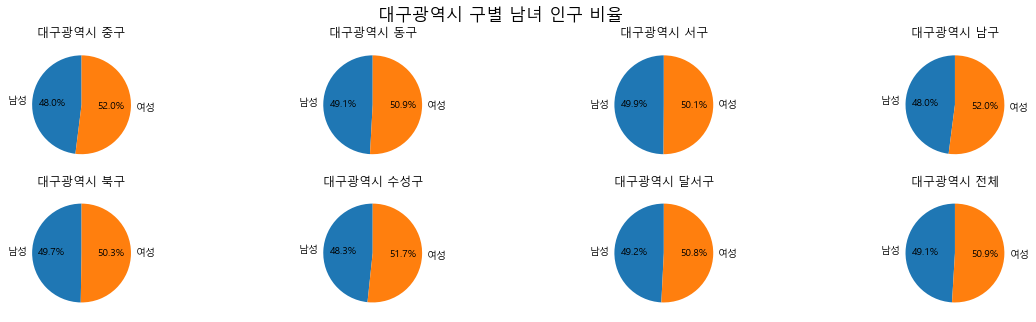

In [50]:
draw_pie_deagu(DEAGU_LIST)